In [19]:
# IMPLEMENT LOGISTIC REGRESSION 
"""
source(https://towardsdatascience.com/logistic-regression-using
-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)
"""
# Loading the data of digits
from sklearn.datasets import load_digits
digits = load_digits()

In [20]:
# Printing the total images in dataset
print("Image data shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label data shape" , digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


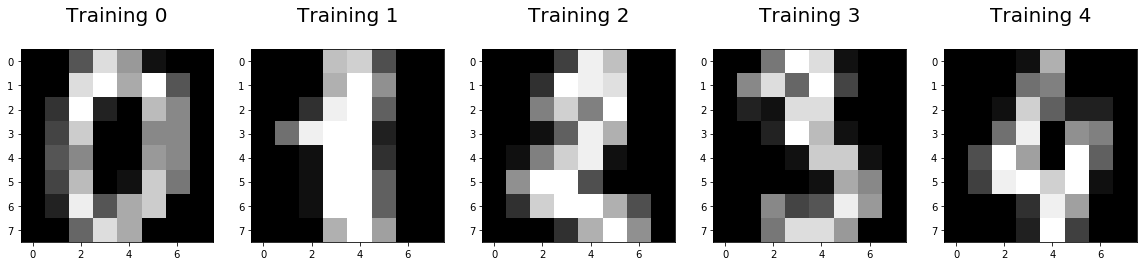

In [21]:
# Visualising images and labels in our dataset
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap = plt.cm.gray)
    plt.title("Training %i\n" % label, fontsize=20)

In [4]:
#Splitting Data into Training and Test Sets (Digits Dataset)
from sklearn.model_selection import train_test_split
# train_test_split to split array into train and test set
# test_size is size to be used for training here 25% it can be float or integer
"""
random_state if none result will always be different,
if a number same traing and test data picked and output same for each iteration 
"""
x_train , x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0) 


In [5]:
# MODELLING PATTERN
# Importing model to be used
from sklearn.linear_model import LogisticRegression
# Making instance of model 
logisticRegr = LogisticRegression()

In [6]:
# Training the model on data , model is learning relation between x_train , y_train
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# PREDICT LABELS FOR NEW DATA
# predicts for one observation(image) ,returns a numpy array
logisticRegr.predict(x_test[100].reshape(1,-1))

array([5])

[ 0.  4. 16. 16. 16. 10.  3.  0.  0. 12. 16.  9.  8. 12.  3.  0.  0. 10.
 16.  2.  0.  0.  0.  0.  0.  3. 16. 12.  0.  0.  0.  0.  0.  0.  7. 16.
  9.  0.  0.  0.  0.  0.  0. 12. 16.  1.  0.  0.  0.  3. 10. 15. 15.  1.
  0.  0.  0.  4. 16. 13.  3.  0.  0.  0.]


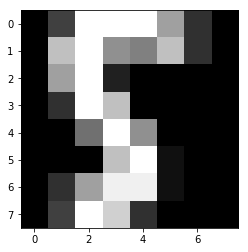

In [8]:
#Checking the prediction manually by plotting
print(x_test[100])
plt.imshow(np.reshape(x_test[100],(8,8)), cmap = plt.cm.gray)

In [9]:
# Predict for multiple observations
logisticRegr.predict(x_train[0:10])

array([2, 8, 9, 7, 2, 1, 4, 9, 3, 2])

In [10]:
# Making predictions on entire dataset
predictions = logisticRegr.predict(x_test)

In [11]:
# MEASURING MODEL PERFORMANCE 
"""
    Measured using accuracy 
    accuracy = correct predictions / total number of data points 
"""
#use score method to get accuracy of model 
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


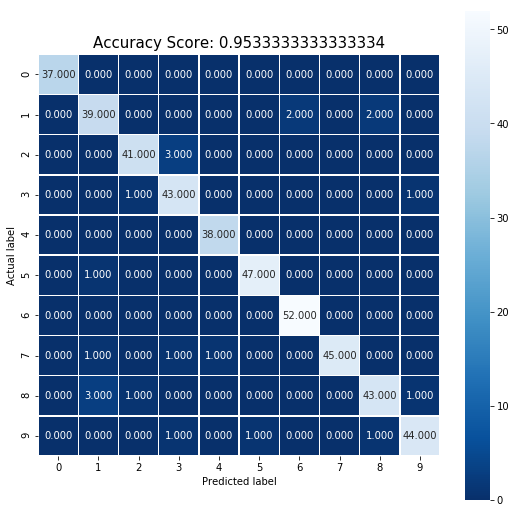

In [12]:
# MEASURING THE MODEL PERFORMANCE 
"""
    CONFUSION MATRIX 
    -The confusion matrix shows the ways in which your classification model
    is confused when it makes predictions.
    -Better than accuary because it tells how much each class is classified correctly
    -Comparision between actual label and predicted label
"""
# method 1 - sklearn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test , predictions)
print(cm)

#method 2 - seaborn
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [13]:
# USING MNIST DATA INSTEAD OF DIGIT-DATASET

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('mnist original')

In [14]:
# Printing number of images and labels in mnist dataset
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [15]:
# Spliting training and test data
from sklearn.model_selection import train_test_split
#The test_size=1/7.0 makes the training set size 60,000 images and the test set size of 10,000.
train_img, test_img, train_label, test_label  = train_test_split(mnist.data, mnist.target, test_size = 1/7.0,random_state = 0 ) 

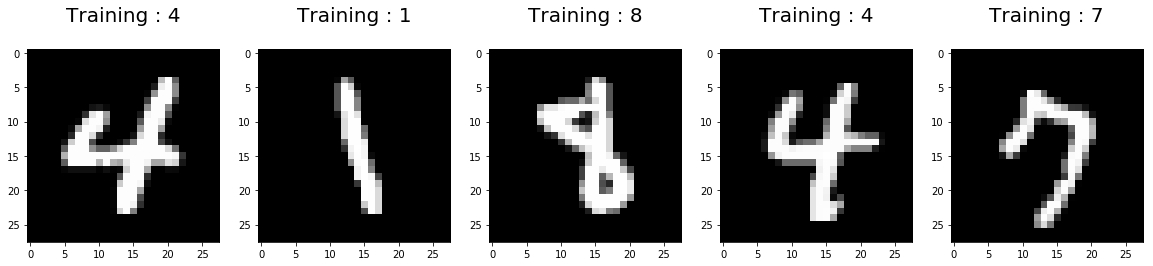

In [16]:
# MNIST IMAGES AND LABELS
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_label[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap= plt.cm.gray)
    plt.title("Training : %i\n" % label , fontsize = 20)

In [17]:
# MODELLING PATTERN
from sklearn.linear_model import LogisticRegression
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')
# Fitting data
logisticRegr.fit(train_img, train_label)
# Prediction
logisticRegr.predict(test_img[0].reshape(1,-1))
logisticRegr.predict(test_img[0:10])
predictions = logisticRegr.predict(test_img)

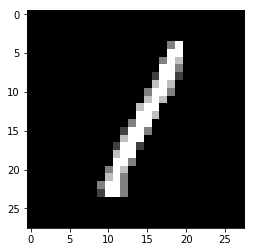

In [22]:
# Checking whether prediction and actual image matched or not
plt.imshow(np.reshape(test_img[0], (28,28)), cmap= plt.cm.gray)

In [23]:
print(predictions[0])

1.0
